In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230112-151425.629 47503 INFO root:20 local study files stored in: /Users/sgpeo/projects/cellenium/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/24539828"
adata = prep.get_h5ad_from_url(url, "pancreas_atlas_original")

In [3]:
prep.jupyter_h5ad_overview(adata)

,tech,celltype,size_factors
D101_5,celseq,gamma,0.028492
D101_43,celseq,gamma,0.079348
D101_93,celseq,gamma,0.037932
D102_4,celseq,gamma,0.047685
D172444_23,celseq,gamma,0.038683
...,...,...,...
Sample_1594,smarter,gamma,1.000000
Sample_1595,smarter,gamma,1.000000
Sample_1597,smarter,gamma,1.000000
Sample_1598,smarter,gamma,1.000000


""
A1BG
A1CF
A2M
A2ML1
A4GALT
...
ZXDC
ZYG11B
ZYX
ZZEF1


(16382, 19093)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.6120808 , 0.        , 0.        , ..., 0.        , 2.6120806 ,
        0.        ],
       [0.        , 3.311074  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42996258, 2.6206095 , 0.        , ..., 2.1124895 , 1.0953737 ,
        1.0403827 ],
       [3.4695568 , 0.64595073, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4566651 , 0.5159923 , 0.        , ..., 0.        , 0.53929645,
        0.        ]], dtype=float32)

(16382, 19093)

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 1.0019583,  0.       ,  0.       , ...,  0.       ,  1.001958 ,
         0.       ],
       [ 0.       ,  1.0019583,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.5372   , 12.7441   ,  0.       , ...,  7.2688   ,  1.9903   ,
         1.8303   ],
       [31.1225   ,  0.9078   ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.5788   ,  0.6753   ,  0.       , ...,  0.       ,  0.7148   ,
         0.       ]], dtype=float32)

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

20230112-151441.675 47503 INFO root:98 make_sparse: conversion to sparse matrix done
20230112-151456.536 47503 INFO root:123 make_norm_expression: no transformations necessary
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


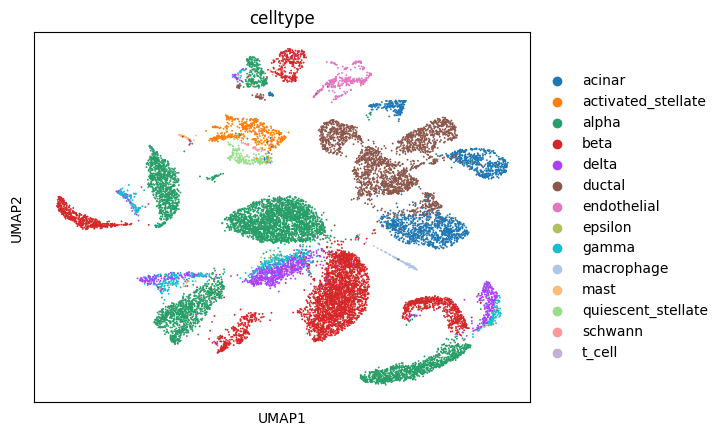

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='celltype')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['celltype'])

diff.exp. genes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.59s/it]
20230112-151535.469 47503 INFO root:292 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['celltype']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,GCG,102.588081,9.622347,0.000000,0.000000,alpha,_OTHERS_,celltype
1,TTR,101.802109,7.429225,0.000000,0.000000,alpha,_OTHERS_,celltype
2,GC,90.504433,7.160712,0.000000,0.000000,alpha,_OTHERS_,celltype
3,CLU,89.230843,4.159941,0.000000,0.000000,alpha,_OTHERS_,celltype
4,TMEM176B,88.459518,4.975933,0.000000,0.000000,alpha,_OTHERS_,celltype
...,...,...,...,...,...,...,...,...
1395,CAPG,2.347904,5.304263,0.018879,0.669686,t_cell,_OTHERS_,celltype
1396,RPS20,2.344307,1.394290,0.019062,0.671128,t_cell,_OTHERS_,celltype
1397,CRIP1,2.342588,5.369778,0.019151,0.671128,t_cell,_OTHERS_,celltype
1398,CBX3,2.337592,2.580271,0.019408,0.673784,t_cell,_OTHERS_,celltype


In [ ]:
prep.set_cellenium_metadata(
    adata,
    title='Pancreas Atlas',
    description='',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12393'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['celltype', 'tech']
)

In [7]:
prep.cello_classify_celltypes(adata, 'celltype')

Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Could not find compatible pre-trained model.
Found CellO resources at '/Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources'.
Loading ontology...
Loading expression data from /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/training_set/log_tpm.h5...
Loaded matrix of shape (4293, 58243)
done.
Inferred that input file uses HGNC gene symbols.
Of 18158 genes in the input file, 17312 were found in the training set of 58243 genes.
Training model...
Fitting PCA with 3000 components...
done.
Transforming with PCA...
done.
(1/317)
Training classifier for label CL:0000576...
Number of positive items: 314
Number of negative items: 3950
(2/317)
Training classifier for label CL:0002087...
Number of positive items: 2010
Number of negative items: 2267
(3/317)
Training classifier for label CL:2000001...
Number of positive items: 1575
Number of negative items: 2242
(4/317)
Training classifier for label CL:0000842...
Number of positive items: 2010
Numbe

/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/cello/cello.py:477: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad_mean_clust = AnnData(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Transforming with PCA...
done.
Making predictions for each classifier...
Running solver on item 1/14...
Running solver on item 2/14...
Running solver on item 3/14...
Running solver on item 4/14...
Running solver on item 5/14...
Running solver on item 6/14...
Running solver on item 7/14...
Running solver on item 8/14...
Running solver on item 9/14...
Running solver on item 10/14...
Running solver on item 11/14...
Running solver on item 12/14...
Running solver on item 13/14...
Running solver on item 14/14...
Checking if any pre-trained model is compatible with this input dataset...


/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.2.post1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Of 18158 genes in the input file, 17312 were found in the training set of 58243 genes.
Of 18158 genes in the input file, 16735 were found in the training set of 31283 genes.
Using thresholds stored in /Users/sgpeo/projects/cellenium/cellenium/scratch/cello_resources/resources/trained_models/ir.10x_genes_thresholds.tsv
Binarizing classifications...
Mapping each sample to its predicted labels...
Computing the most-specific predicted labels...
Loading ontology...
Item acinar predicted to be "enteroendocrine cell (CL:0000164)"
Item activated_stellate predicted to be "enteroendocrine cell (CL:0000164)"
Item alpha predicted to be "pancreatic A cell (CL:0000171)"
Item beta predicted to be "type B pancreatic cell (CL:0000169)"
Item delta predicted to be "pancreatic A cell (CL:0000171)"
Item ductal predicted to be "enteroendocrine cell (CL:0000164)"
Item endothelial predicted to be "endothelial cell of umbilical vein (CL:0002618)"
Item epsilon predicted to be "pancreatic A cell (CL:0000171)"
It

# final h5ad file

In [8]:
adata.write(prep.basedir.joinpath("pancreas_atlas.h5ad"))
prep.jupyter_h5ad_overview(adata)

... storing 'CellO_celltype' as categorical


,tech,celltype,size_factors,n_genes,CellO_celltype
D101_5,celseq,gamma,0.028492,1857,pancreatic A cell
D101_43,celseq,gamma,0.079348,3724,pancreatic A cell
D101_93,celseq,gamma,0.037932,2261,pancreatic A cell
D102_4,celseq,gamma,0.047685,2653,pancreatic A cell
D172444_23,celseq,gamma,0.038683,2230,pancreatic A cell
...,...,...,...,...,...
Sample_1594,smarter,gamma,1.000000,5842,pancreatic A cell
Sample_1595,smarter,gamma,1.000000,5196,pancreatic A cell
Sample_1597,smarter,gamma,1.000000,6356,pancreatic A cell
Sample_1598,smarter,gamma,1.000000,4170,pancreatic A cell


,n_cells,highly_variable,means,dispersions,dispersions_norm
A1BG,3178,False,1.134396,3.285579,-1.303474
A1CF,5937,False,2.421867,3.865486,-0.326856
A2M,789,True,0.953092,4.464095,1.130269
A2ML1,487,False,0.059040,2.530744,-0.840526
A4GALT,879,False,0.863278,4.056504,0.343769
...,...,...,...,...,...
ZXDC,5128,False,1.934419,3.574131,-0.850696
ZYG11B,6073,False,2.153809,3.690499,-0.720645
ZYX,5334,False,2.687989,4.319490,0.417652
ZZEF1,5093,False,1.872796,3.769604,-0.401373


(16382, 18268)

<16382x18268 sparse matrix of type '<class 'numpy.float32'>'
	with 55643451 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	OrderedDict([('hvg', {'flavor': 'seurat'}), ('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 20}}), ('umap', {'params': {'a': 0.5830300205483709, 'b': 1.334166992455648}}), ('celltype_colors', ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']), ('cellenium', {'differentially_expressed_genes':          names      scores  logfoldchanges     pvals  pvals_adj  \
0          GCG  102.588081        9.622347  0.000000   0.000000   
1          TTR  101.802109        7.429225  0.000000   0.000000   
2           GC   90.504433        7.160712  0.000000   0.000000   
3          CLU   89.230843        4.159941  0.000000   0.000000   
4     TMEM176B   88.459518        4.975933  0.000000   0.000000   
...        ...         ...           